# Andres Graterol - 4031393 - Fall 22

# Homework 4 Question 1

In [34]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Dataset Generation

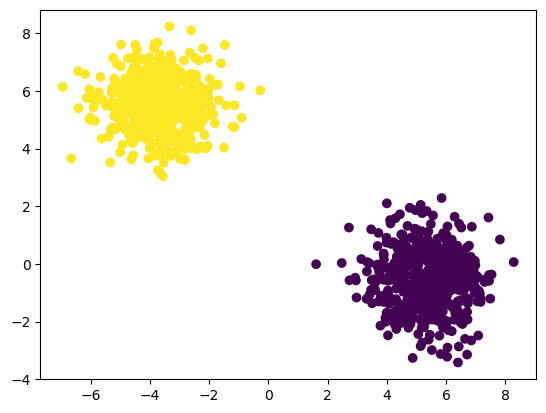

In [35]:
# Create 2D Gaussian Blobs
# Generate and plot 1000 samples from classes C1 and C2
X, y = make_blobs(n_samples=1000, centers=2)
plt.scatter(X[:,0], X[:,1], c=y)

In [36]:
# Obtain training and test data 
# 75/25 train/test split
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

#print("x train: ", X_train)
#print("shape of x:", X_train.shape)
print("t: ", y_train)
print("shape of t:", y_train.shape)

print("x test:", X_test)
print("shape of x test:", X_test.shape)

t:  [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 

## Least-squares Solution

In [65]:
# Create the matrix of augmented inputs 
def create_x_matrix(data_points):
    x_matrix = []
    
    for i in range(len(data_points)):
        row_array = [1, data_points[i][0], data_points[i][1]]
        x_matrix.append(row_array)
        
    x_matrix = np.array(x_matrix)
    
    return x_matrix

# Create the one hot encoding matrix
def create_t_matrix(labels):
    t_matrix = []
    
    for i in range(len(labels)):
        row_array = [1-labels[i], labels[i]]
        t_matrix.append(row_array)
        
    t_matrix = np.array(t_matrix)
    t_matrix = t_matrix.squeeze()
    
    return t_matrix

# Map a prediction to the class with the larger value
def map_to_class(prediction):
    if(prediction[0] > prediction[1]):
        # One-hot encoding for class 0
        prediction = [1, 0]
    else:
        # One-hot encoding for class 1
        prediction = [0, 1]
        
    return prediction;

# Compute the predictions and output them into an array
def compute_predictions(weights, test_data):
    prediction_matrix = []
    
    for i in range(len(test_data)):
        row_array = []
        xn = [1, test_data[i][0], test_data[i][1]]
        xn = np.array(xn)

        prediction = np.matmul(np.transpose(weights), xn)
        #print("prediction shape", prediction.shape)
        
        prediction = map_to_class(prediction)
        
        prediction_matrix.append(prediction)
        
    prediction_matrix = np.array(prediction_matrix)
    
    return prediction_matrix

def compute_test_accuracy(ground_truth, predictions):
    correct_count = 0;
    for i in range(len(ground_truth)):
        if(ground_truth[i][0] == predictions[i][0]):
            correct_count += 1
            
    accuracy = correct_count/len(predictions)
    
    return accuracy

In [66]:
X = create_x_matrix(X_train)
print("Shape of x matrix:", X.shape)

T = create_t_matrix(y_train)
print("Shape of t matrix:", T.shape)

weights = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), T))
print("Shape of the weights:", weights.shape)

Shape of x matrix: (750, 3)
Shape of t matrix: (750, 2)
Shape of the weights: (3, 2)


In [71]:
labels = create_t_matrix(y_test)
print(labels)
#print("shape of test labels:", labels.shape)

predictions = compute_predictions(weights, X_test)
print(predictions)
#print("shape of predictions:", predictions.shape)

accuracy = compute_test_accuracy(labels, predictions)
print(accuracy)

[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]